In [1]:
from imports import *
from scipy.stats import spearmanr

In [146]:
query = "select * from cleaned_application_ml"
app_data = sql_connect(query)
app_data.head()

Connection to SQL Server established successfully.
Connection closed.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          -2120.0           -1           1               1                0   
1           -291.0           -1           1               1                0   
2          -2531.0           26           1               1                1   
3          -2437.0           -1           1               1                0   
4          -3458.0           -1           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

In [4]:
app_data.shape

(49999, 79)

Its very wide data, we need to explore relation with numceric columns

In [3]:
numeric_col = [col for col in app_data.columns if app_data[col].dtype != 'object' and app_data[col].nunique() > 2 and col not in ['SK_ID_CURR', 'TARGET']]
binary_cols = [col for col in app_data.columns if app_data[col].dtype != 'object' and app_data[col].nunique() == 2 and col != 'TARGET']
categorical_cols = [col for col in app_data.columns if app_data[col].dtype == 'object']

In [6]:
spearman_corr = pd.DataFrame(app_data[numeric_col + ['TARGET']].corr(method='spearman')['TARGET'].drop('TARGET'))
spearman_corr['abs_target'] = spearman_corr['TARGET'].abs()
spearman_corr[spearman_corr['abs_target'] > 0.01]

TARGET  abs_target
CNT_CHILDREN                 0.026460    0.026460
AMT_INCOME_TOTAL            -0.019943    0.019943
AMT_CREDIT                  -0.017974    0.017974
AMT_GOODS_PRICE             -0.032118    0.032118
REGION_POPULATION_RELATIVE  -0.034614    0.034614
DAYS_BIRTH                   0.077202    0.077202
DAYS_EMPLOYED                0.028468    0.028468
DAYS_REGISTRATION            0.039745    0.039745
DAYS_ID_PUBLISH              0.047455    0.047455
REGION_RATING_CLIENT         0.066057    0.066057
REGION_RATING_CLIENT_W_CITY  0.067080    0.067080
HOUR_APPR_PROCESS_START     -0.029288    0.029288
OBS_30_CNT_SOCIAL_CIRCLE     0.015417    0.015417
DEF_30_CNT_SOCIAL_CIRCLE     0.037927    0.037927
OBS_60_CNT_SOCIAL_CIRCLE     0.015548    0.015548
DEF_60_CNT_SOCIAL_CIRCLE     0.039438    0.039438
DAYS_LAST_PHONE_CHANGE       0.054622    0.054622
AMT_REQ_CREDIT_BUREAU_DAY    0.015081    0.015081
AMT_REQ_CREDIT_BUREAU_QRT   -0.013021    0.013021
AVERAGE_EXTERNAL_RATING     -0.202418    0.202418
PREV_APPROVED_CNT           -0.014031    0.014031
PREV_REFUSED_CNT             0.018617    0.018617

In [7]:
from scipy.stats import pointbiserialr

binary_corrs = {}
for col in binary_cols:
    corr, _ = pointbiserialr(app_data[col], app_data['TARGET'])
    binary_corrs[col] = corr

binary_corr_series = pd.Series(binary_corrs).sort_values(key=abs, ascending=False)
print(binary_corr_series[binary_corr_series > 0.01])

REG_CITY_NOT_WORK_CITY     0.048451
FLAG_DOCUMENT_3            0.045050
FLAG_EMP_PHONE             0.041408
REG_CITY_NOT_LIVE_CITY     0.038773
LIVE_CITY_NOT_WORK_CITY    0.032261
ISMISSING_BUREAU_INFO      0.030955
FLAG_WORK_PHONE            0.021302
dtype: float64


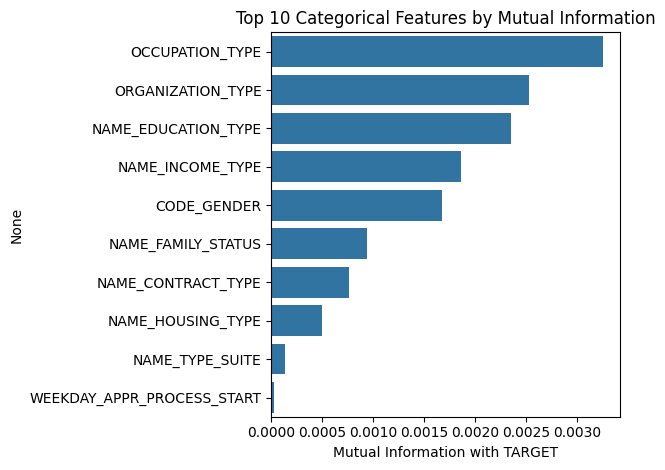

In [8]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


app_cat_encoded = app_data[categorical_cols].astype(str).copy()

for col in categorical_cols:
    app_cat_encoded[col] = LabelEncoder().fit_transform(app_cat_encoded[col])

# Step 3: Compute Mutual Information
mi_scores = mutual_info_classif(app_cat_encoded, app_data['TARGET'], discrete_features=True)
mi_series = pd.Series(mi_scores, index=categorical_cols).sort_values(ascending=False)


sns.barplot(x=mi_series.head(10).values, y=mi_series.head(10).index)
plt.title("Top 10 Categorical Features by Mutual Information")
plt.xlabel("Mutual Information with TARGET")
plt.tight_layout()
plt.show()


### Class imbalance is there

Till now we couldnt see any highle correlated feature but these were univaraite , we need to see how can I draw useful feature from this

Text(0.5, 0, 'Target')

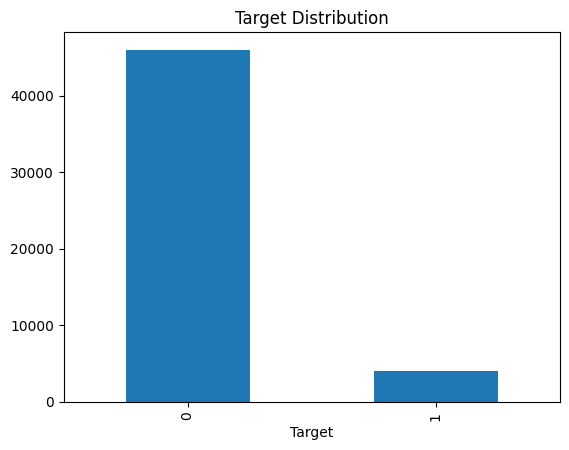

In [77]:
app_data['TARGET'].value_counts().plot(kind='bar', title='Target Distribution')
plt.xlabel('Target')    

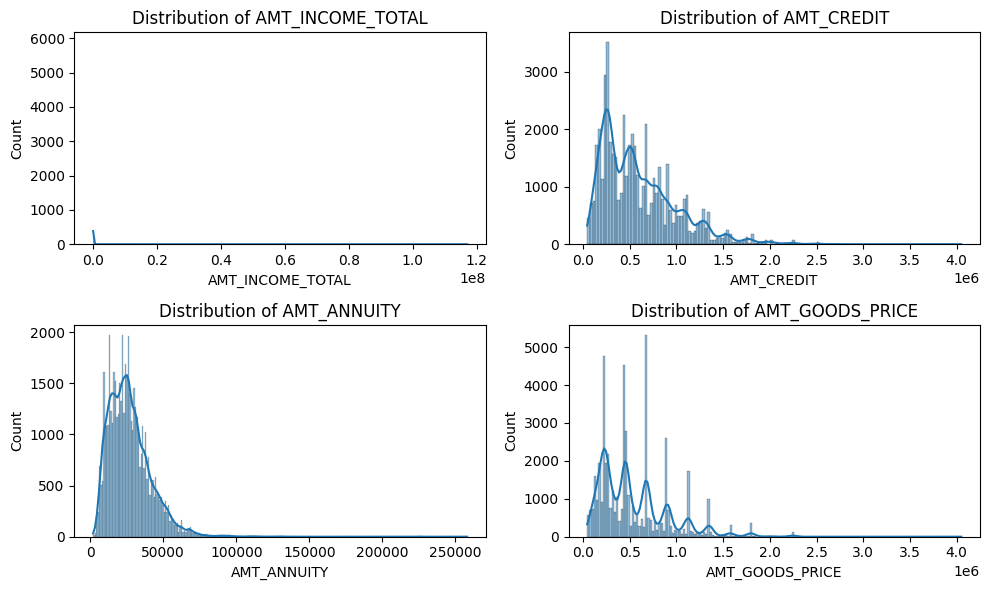

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
    sns.histplot(app_data[col], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show();

All the amount-related features are highly skewed. To preserve the data and mitigate the effect of outliers, a log transformation will be applied. This will help in reducing skewness and improving the distribution for further analysis.

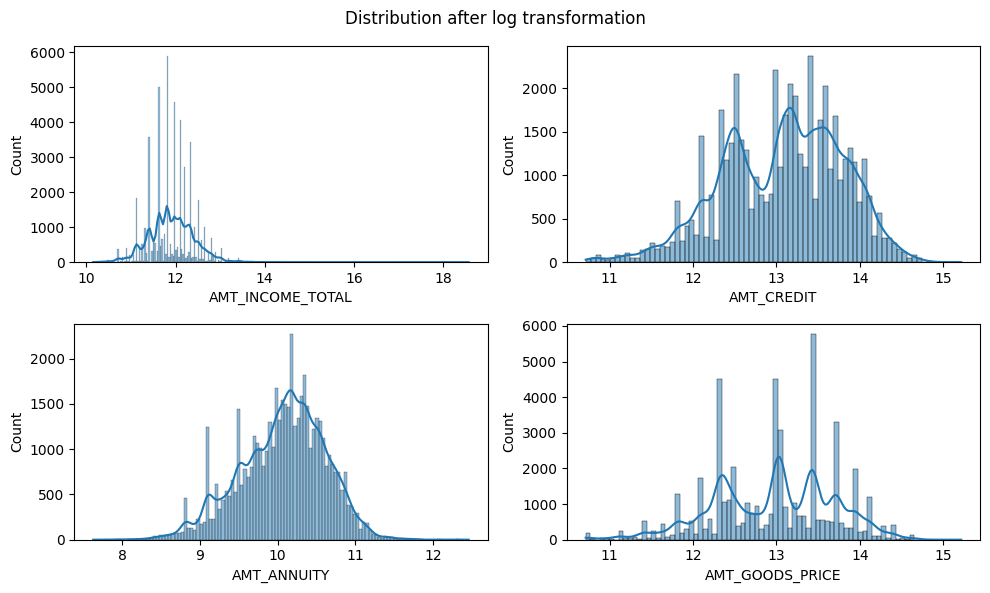

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
    sns.histplot(np.log1p(app_data[col]), kde=True, ax=ax[i])
plt.suptitle(f'Distribution after log transformation')
plt.tight_layout()
plt.show();

The log transformation has worked well, bringing all values within a reasonable range. However, there remains one influential point in AMT_INCOME_TOTAL that warrants further investigation. It may be an outlier or a data entry error and will be reviewed accordingly.

In [11]:
app_data[app_data['AMT_INCOME_TOTAL'] == app_data['AMT_INCOME_TOTAL'].max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F             0   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                1             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643      -12615           -922   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
12840            -6762.0          -3643.0           -1           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
12840               1                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840           0        Laborers                3                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                       14                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                       0                       0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
12840                        0  Business Entity Type 3   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840                         0                         0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                         0                         0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
12840                       0                0                1   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
12840                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
12840                0                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  AVERAGE_EXTERNAL_RATING  TOT_PREV_APP  \
12840                         1.0                   0.2398             0   

       PREV_APPROVED_CNT  PREV_CANCELLED_CNT  PREV_REFUSED_CNT  \
12840                  0                   0                 0   

       PREV_UNUSED_CNT  ISMISSING_BUREAU_INFO  
12840                0                      0

A Laborer with such an unusually high income is highly unlikely, and he defaulted so its a valid example so need to deal with outlier

### Updating the db with removed outlier

In [13]:
#engine = write_sql_conn_create()
#app_data.to_sql('cleaned_application_ml', engine, if_exists='replace', index=False)

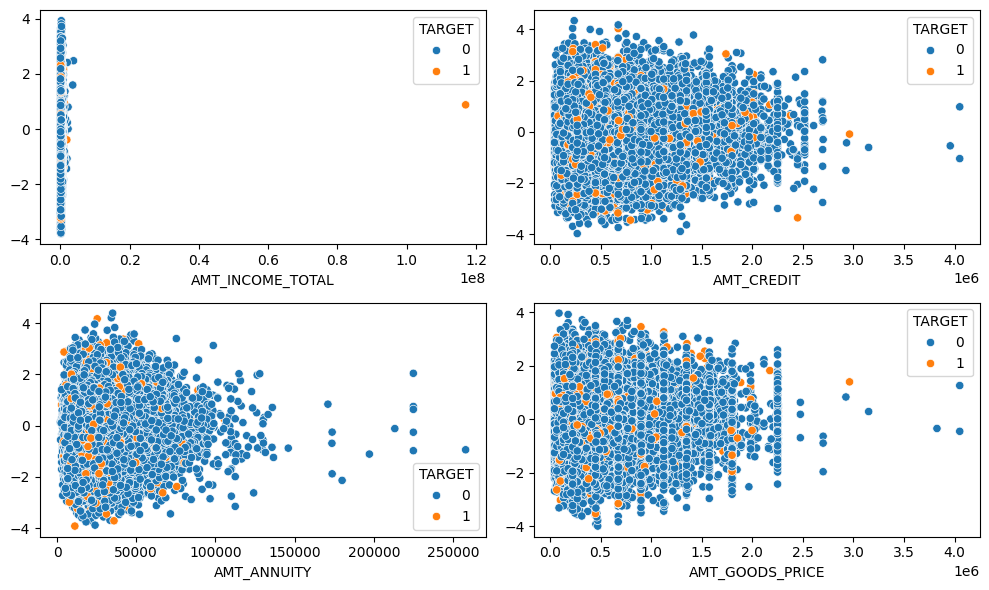

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
   
    sns.scatterplot(y=np.random.normal(size=len(app_data)), x=app_data[col], ax=ax[i], hue=app_data['TARGET'])
plt.tight_layout()
plt.show()

I do see there are still outlier and they are are not even defaulter so the defaulte are disguising so removng th eoutlier can help linear models

AMT_INCOME_TOTAL
Rejection 3 points
z-score of 4 corresponds to a prob of 0.01%
AMT_CREDIT
Rejection 169 points
z-score of 4 corresponds to a prob of 0.01%
AMT_ANNUITY
Rejection 203 points
z-score of 4 corresponds to a prob of 0.01%
AMT_GOODS_PRICE
Rejection 171 points
z-score of 4 corresponds to a prob of 0.01%


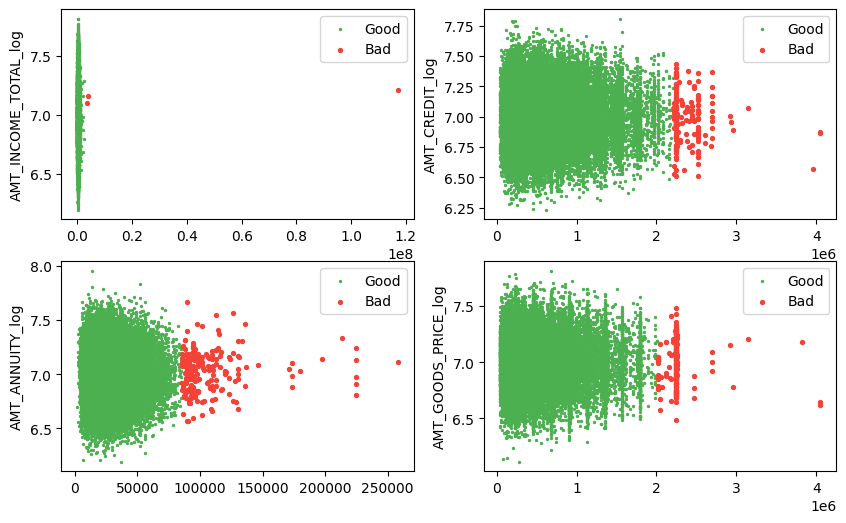

In [148]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
    print(col)
    d1 = app_data[f'{col}']
    mean, std = np.mean(d1), np.std(d1)
    z_score = np.abs((d1 - mean) / std)
    threshold = 4
    good = z_score < threshold

    print(f"Rejection {(~good).sum()} points")
    from scipy.stats import norm
    print(f"z-score of 4 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
    visual_scatter = np.random.normal(7, 0.2, size=d1.size)
    ax[i].scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
    ax[i].scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
    ax[i].set_ylabel(f'{col}_log')
    ax[i].legend();

but as this outlier would have some indicatore so instead of removing we can winsorize it

In [4]:
for i, col in enumerate(numeric_col[1:5]):
    q_low = app_data[col].quantile(0.01)
    q_hi  = app_data[col].quantile(0.99)
    app_data[f'{col}_win'] = app_data[col].clip(q_low, q_hi)

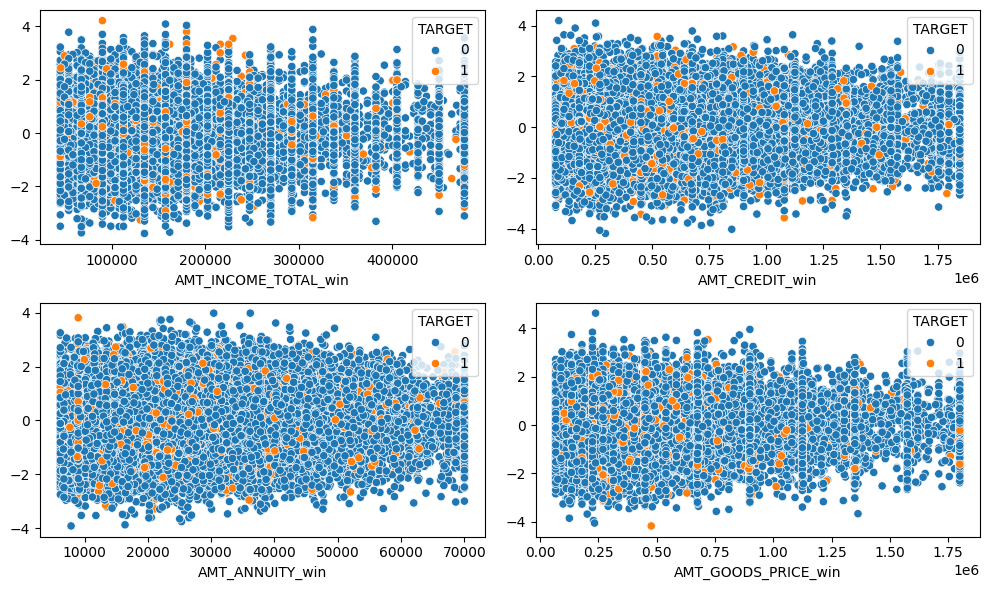

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
   
    sns.scatterplot(y=np.random.normal(size=len(app_data)), x=app_data[f'{col}_win'], ax=ax[i], hue=app_data['TARGET'])
plt.tight_layout()
plt.show()

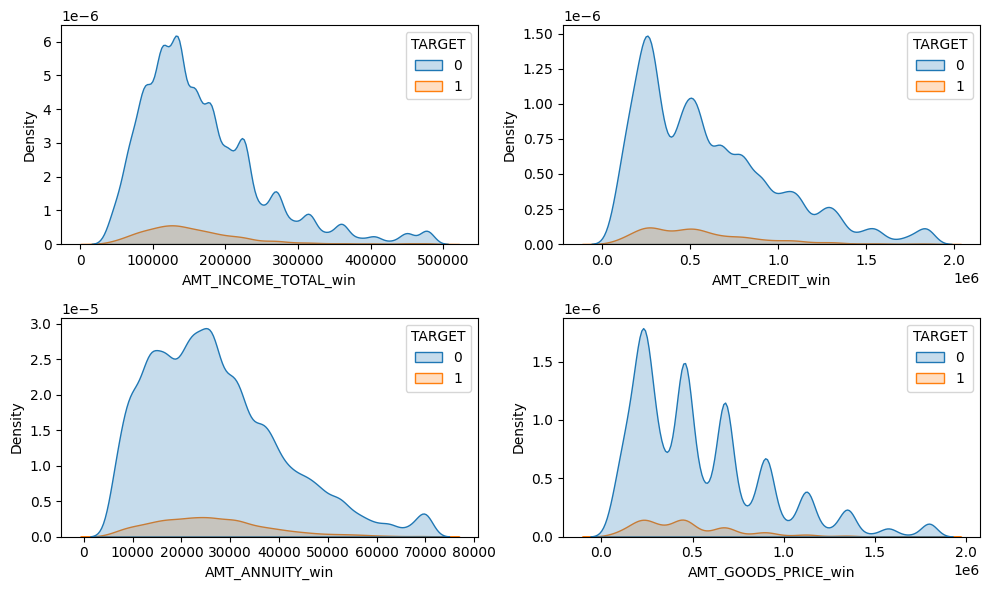

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
    sns.kdeplot(data=app_data, x=app_data[f'{col}_win'], hue='TARGET', fill=True, ax=ax[i])

plt.tight_layout()

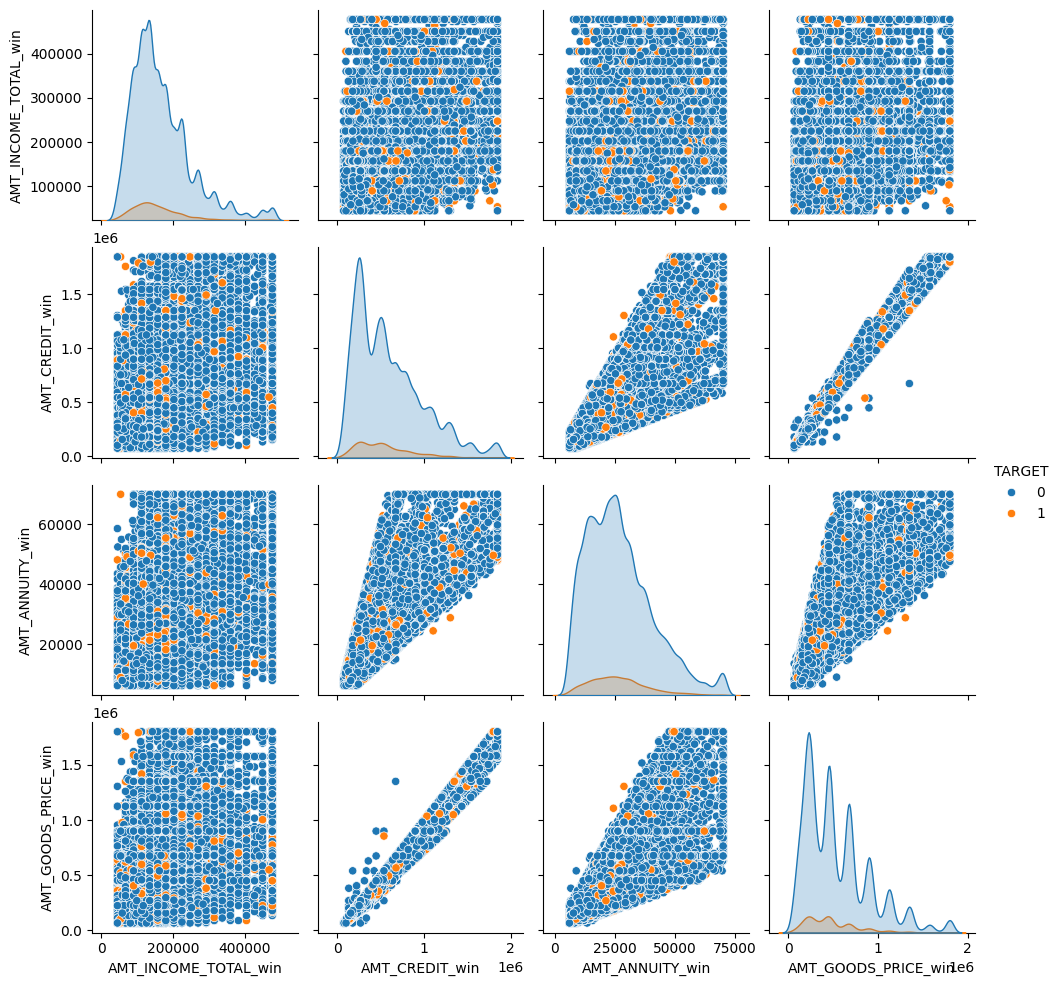

In [85]:
sns.pairplot(app_data[[col + '_win' for col in numeric_col[1:5]] + ['TARGET']], hue='TARGET')

There seems to high correlation between few covariate, this will induce multicollinearity

Lets try creating ratios like DEBT to INCOME, Annuity to Income, to see if there are obvious relation that uncvoer here they are very dense

All class overlap, let try getting some feature from this variables

In [5]:
app_data['DEBT_TO_INCOME'] = app_data['AMT_CREDIT_win']/app_data['AMT_INCOME_TOTAL_win']
app_data['ANNUITY_TO_INCOME'] = app_data['AMT_ANNUITY_win']/app_data['AMT_INCOME_TOTAL_win']
app_data['GOODS_TO_INCOME'] = app_data['AMT_GOODS_PRICE_win']/app_data['AMT_INCOME_TOTAL_win']

In [11]:
app_data[['DEBT_TO_INCOME', 'ANNUITY_TO_INCOME', 'GOODS_TO_INCOME']].describe()

DEBT_TO_INCOME  ANNUITY_TO_INCOME  GOODS_TO_INCOME
count    49999.000000       49999.000000     49999.000000
mean         3.951160           0.180427         3.541586
std          2.648067           0.092305         2.396640
min          0.251556           0.015244         0.222222
25%          2.036794           0.115296         1.866667
50%          3.290588           0.162633         2.941176
75%          5.143048           0.228083         4.605263
max         41.060080           1.301500        40.000000

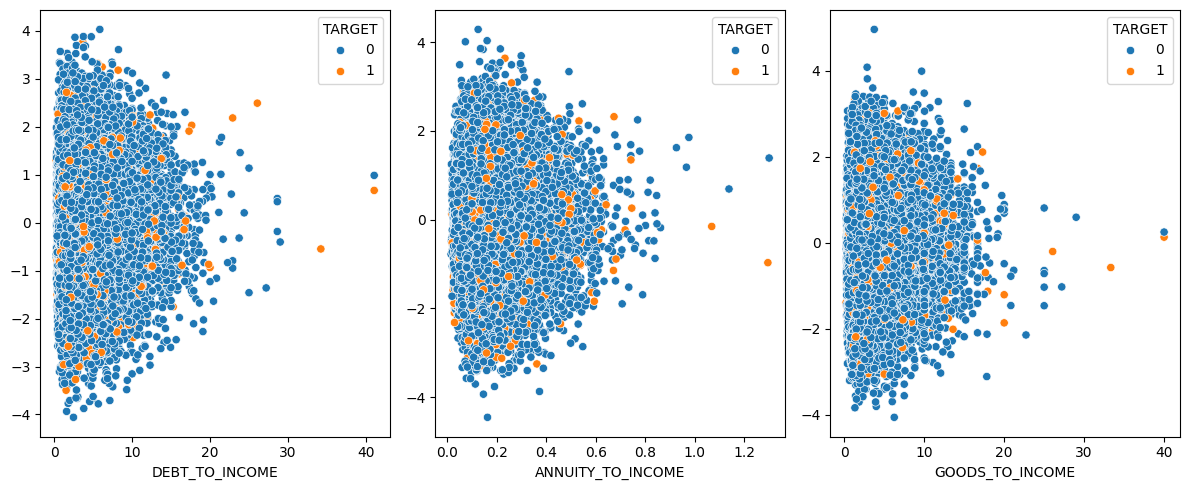

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax = ax.flatten()
for i, col in enumerate(['DEBT_TO_INCOME', 'ANNUITY_TO_INCOME', 'GOODS_TO_INCOME']):
    sns.scatterplot(y=np.random.normal(size=len(app_data)), x=app_data[f'{col}'], ax=ax[i], hue=app_data['TARGET'])

plt.tight_layout()
plt.show()

DEBT_TO_INCOME AND aNNUITY_TO_INCOME looks a bit pormising compared to credit to goods in univaraite analysis

Exploring bivariate to se eif there any correlation between these

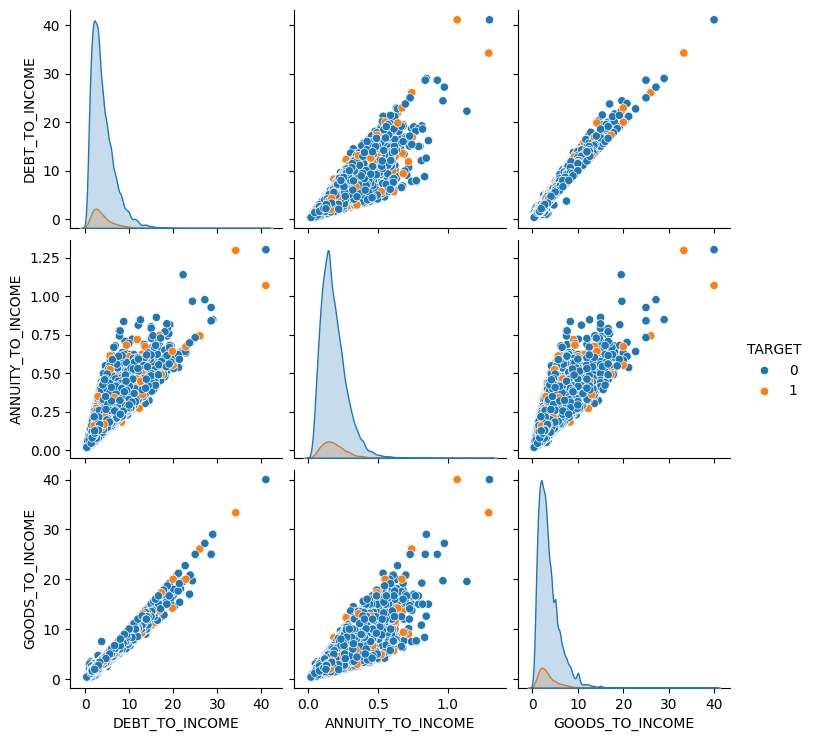

In [94]:
sns.pairplot(app_data[['DEBT_TO_INCOME', 'ANNUITY_TO_INCOME', 'GOODS_TO_INCOME', 'TARGET']], hue='TARGET', diag_kind='kde')

All are correalted, so absed on spreadi I will be keeping onlt debt to income and i will drop the rest and also AMT columns 

In [ ]:
app_data.drop([col for col in app_data.columns if ('AMT' in col and 'REQ' not in col) or col in ['ANNUITY_TO_INCOME', 'GOODS_TO_INCOME']], axis=1)

## But the distribuiton is still skewed so lets try apply log

In [6]:
app_data['DEBT_TO_INCOME_log'] = np.log1p(app_data['DEBT_TO_INCOME'])

<Axes: xlabel='DEBT_TO_INCOME_log', ylabel='Count'>

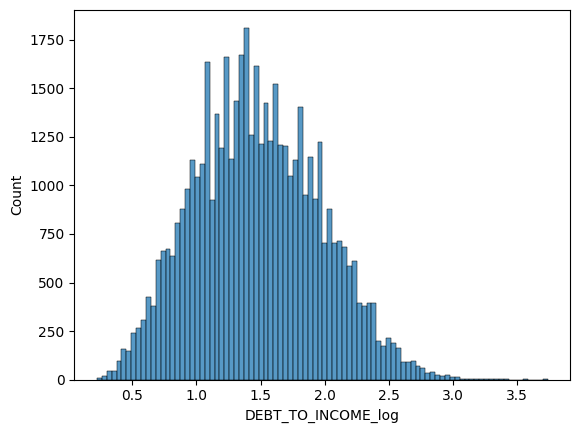

In [7]:
sns.histplot(app_data['DEBT_TO_INCOME_log'])

<Axes: xlabel='ANNUITY_TO_INCOME_log', ylabel='Count'>

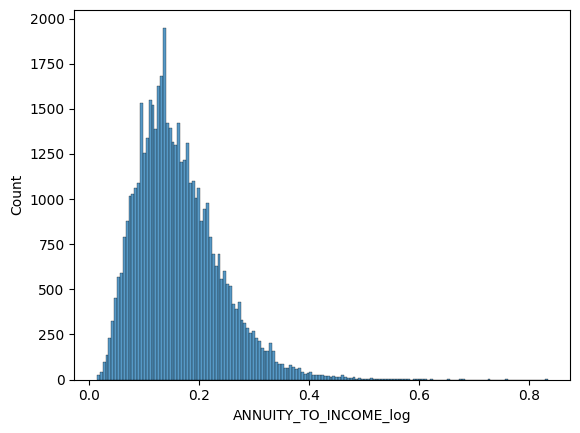

In [26]:
sns.histplot(app_data['ANNUITY_TO_INCOME_log'])

It does not appear that repayment difficulties are strongly dependent on the most important individual columns. Since the dataset contains a large number of features, visualizing each one would be impractical. Therefore, dimensionality reduction is necessary to uncover meaningful patterns.


<Axes: xlabel='N_DOCUMENTS_PROVIDED', ylabel='count'>

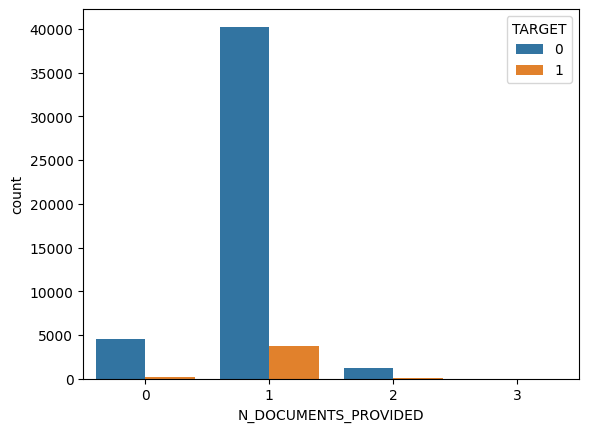

In [14]:
app_data['N_DOCUMENTS_PROVIDED'] = app_data[[col for col in app_data.columns if 'FLAG_DOCUMENT_' in col]].sum(axis=1)

sns.countplot(data=app_data, x='N_DOCUMENTS_PROVIDED', hue='TARGET')

Here I am assuming, the user will be porviding flag doc 1 whoch mandatory but aprat from that how many docs porvided but the field looks very very low variance

However, creating a new field bianry which says if additional_doc_provided, and delete all other values to decreas esaprsity


In [15]:
app_data["ADDITIONAL_DOC_PROVIDED"] = app_data["N_DOCUMENTS_PROVIDED"] > 0
app_data.drop(columns=[col for col in app_data.columns if 'FLAG_DOCUMENT_' in col], inplace=True)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                    0.018801           -1           1               1   
1                    0.003541           -1           1               1   
2                    0.010032           26           1               1   
3                    0.008019           -1           1               1   
4                    0.028663           -1           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                1                 1           1           0        Laborers   
3                0                 1           0           0        Laborers   
4                0                 1           0           0      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                1                     2                            2   
3                2                     2                            2   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3     

In [16]:
#app_data.groupby('ADDITIONAL_DOC_PROVIDED')['TARGET'].value_counts().unstack()
pd.crosstab(app_data['ADDITIONAL_DOC_PROVIDED'], app_data['TARGET'])


TARGET                       0     1
ADDITIONAL_DOC_PROVIDED             
False                     4495   249
True                     41478  3777

### Here also no luck, most defaulters has provided the documents

In [29]:
[col for col in app_data.columns if 'DAYS' in col]

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

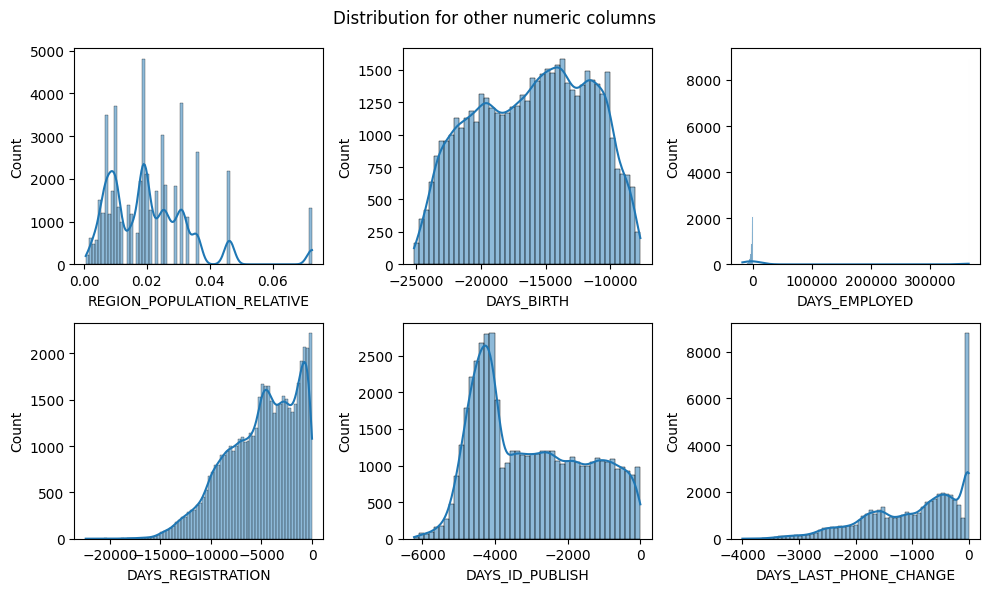

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate([col for col in app_data.columns if 'DAYS' in col or 'REGION_POPULATION_RELATIVE' in col]):
    sns.histplot(app_data[col], kde=True, ax=ax[i])
plt.suptitle(f'Distribution for other numeric columns')
plt.tight_layout()
plt.show();

#### Days Employed has outleier maybe indication not employes



<Axes: ylabel='DAYS_EMPLOYED'>

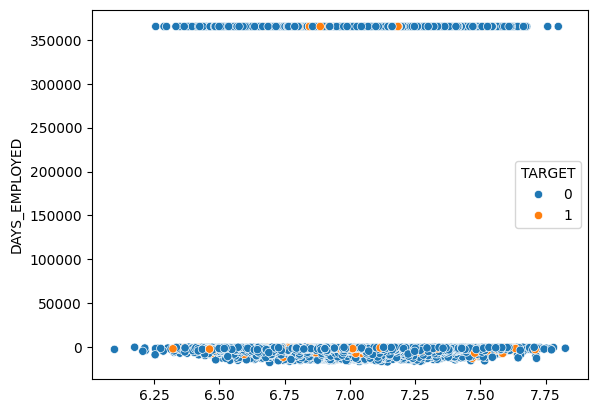

In [31]:
sns.scatterplot(x=np.random.normal(7, 0.2, size=len(app_data)), y=app_data['DAYS_EMPLOYED'], hue=app_data['TARGET'])

In [32]:
app_data[app_data['DAYS_EMPLOYED'] == app_data['DAYS_EMPLOYED'].max()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
8       100011       0         Cash loans           F             0   
11      100015       0         Cash loans           F             0   
23      100027       0         Cash loans           F             0   
38      100045       0         Cash loans           F             0   
43      100050       0         Cash loans           F             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                 1             0      112500.00000   1019610.0      33826.5   
11                1             0       38419.15625    148365.0      10678.5   
23                1             0       83250.00000    239850.0      23850.0   
38                1             0       99000.00000    247275.0      17338.5   
43                1             0      108000.00000    746280.0      42970.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8          913500.0        Children        Pensioner   
11         135000.0        Children        Pensioner   
23         225000.0   Unaccompanied        Pensioner   
38         225000.0   Unaccompanied        Pensioner   
43         675000.0   Unaccompanied        Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
38  Secondary / secondary special               Married  House / apartment   
43               Higher education  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                     0.018634      -20099         365243            -7427.0   
11                    0.015221      -20417         365243            -5246.0   
23                    0.006296      -24827         365243            -9012.0   
38                    0.006207      -23920         365243            -9817.0   
43                    0.010966      -23548         365243            -5745.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8           -3514.0           -1           1               0                0   
11          -2512.0           -1           1               0                0   
23          -3684.0           -1           1               0                0   
38          -4969.0           -1           1               0                0   
43          -4576.0           -1           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8                  1           0           0         Retired                2   
11                 1           1           0         Retired                2   
23                 1           1           0         Retired                2   
38                 1           1           0         Retired                2   
43                 1           0           0         Retired                1   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      2                            2   
11                     2                            2   
23                     3                            3   
38                     2                            2   
43                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                   WEDNESDAY                       14   
11                     FRIDAY                        7   
23                     FRIDAY                       12   
38                     FRIDAY                       11   
43                  WEDNESDAY                        9   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                 

In [33]:
app_data[app_data['DAYS_EMPLOYED'] == app_data['DAYS_EMPLOYED'].max()]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

Imputing them with 0

In [35]:
app_data['DAYS_EMPLOYED'].describe()

count     49999.000000
mean      63219.424488
std      140794.605668
min      -17531.000000
25%       -2786.000000
50%       -1221.000000
75%        -292.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [8]:
app_data['NOT_EMPLOYED_FLAG'] = (app_data['DAYS_EMPLOYED'] == 365243).astype(int)
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].replace(365243, 0)

coNVERTING ALL OF tHEM TO YEARS 


In [10]:
for col in [col for col in app_data.columns if 'DAYS' in col]:
    app_data[f'YEARS{col[4:]}'] = round(app_data[col]/-365, 2)
    app_data.drop(col, axis=1, inplace=True)
    

In [38]:
app_data['YEARS_EMPLOYED'].describe()

count    49999.000000
mean         5.398506
std          6.361994
min         -0.000000
25%          0.800000
50%          3.350000
75%          7.630000
max         48.030000
Name: YEARS_EMPLOYED, dtype: float64

<Axes: xlabel='N_DOCUMENTS_PROVIDED', ylabel='YEARS_EMPLOYED'>

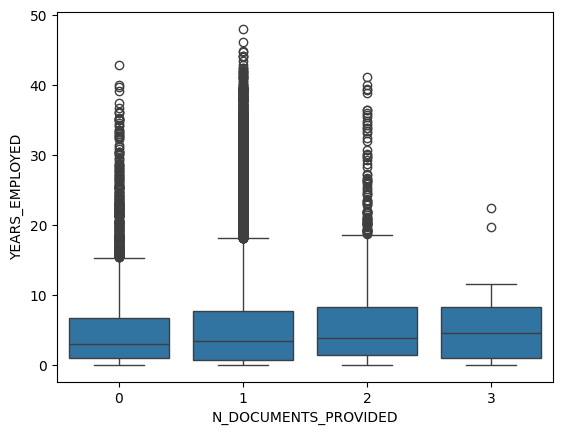

In [44]:
sns.boxplot(data=app_data, y='YEARS_EMPLOYED', x='N_DOCUMENTS_PROVIDED')

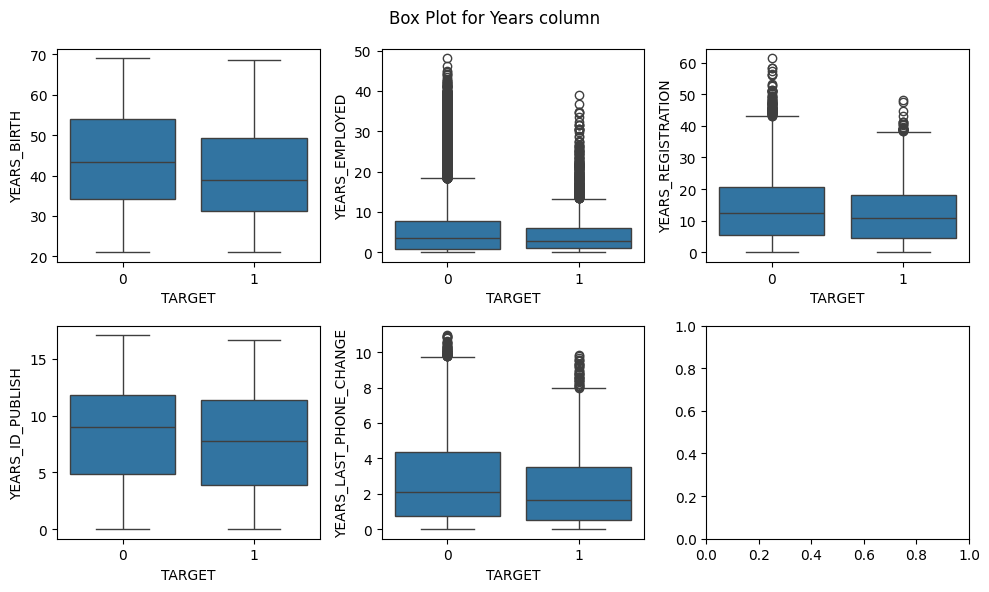

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate([col for col in app_data.columns if 'YEARS' in col ]):
    sns.boxplot(x = 'TARGET', y = col, ax=ax[i], data=app_data)
plt.suptitle(f'Box Plot for Years column')
plt.tight_layout()
plt.show();

### Date of birth and years_id_publish shows slight difference in both target might be use full for modeing, on the other handfor defaulter s median change in phone number reflect frequent changes in phone number, alos

Appling log transform on years_employed, years last phone change and years registration

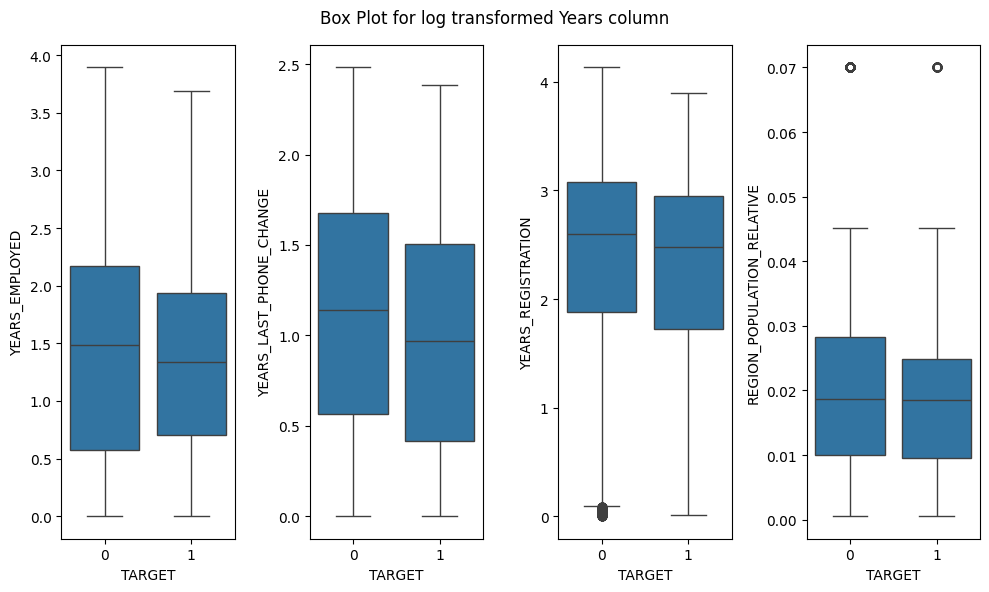

In [46]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate([col for col in ['YEARS_EMPLOYED', 'YEARS_LAST_PHONE_CHANGE', 'YEARS_REGISTRATION', 'REGION_POPULATION_RELATIVE']]):
    sns.boxplot(x = app_data['TARGET'], y = np.log1p(app_data[col]), ax=ax[i])
plt.suptitle(f'Box Plot for log transformed Years column')
plt.tight_layout()
plt.show();

### Now the realtion looks clear,
defaulter has less employment years and frequent phone change

we can drop region_populatoiun relative as it is not adding values

In [11]:
for col in [col for col in ['YEARS_EMPLOYED', 'YEARS_LAST_PHONE_CHANGE', 'YEARS_REGISTRATION']]:
    app_data[f'{col}_log'] = np.log1p(app_data[col])
    #app_data.drop(col, axis=1, inplace=True)

<Axes: xlabel='TARGET', ylabel='EMPLOYMENT_x_DOCS'>

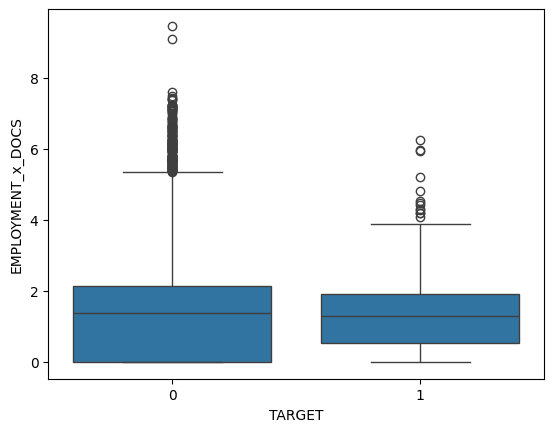

In [17]:
app_data['EMPLOYMENT_x_DOCS'] = app_data['YEARS_EMPLOYED_log'] * app_data['N_DOCUMENTS_PROVIDED']

sns.boxplot(data=app_data, y='EMPLOYMENT_x_DOCS', x='TARGET')

THis could be useful

In [66]:
mutual_info_classif(app_data[['TOTAL_YEAR_RELATION']], app_data['TARGET'], discrete_features=False)

array([0.00443813])

In [619]:
familiy_and_gen_default = app_data.groupby(['CODE_GENDER', 'NAME_FAMILY_STATUS'])['TARGET'].value_counts().unstack()
familiy_and_gen_default['Default rate'] = 100 * round(familiy_and_gen_default[1]/ familiy_and_gen_default[[0,1]].sum(axis=1), 2)
familiy_and_gen_default

TARGET                                  0       1  Default rate
CODE_GENDER NAME_FAMILY_STATUS                                 
F           Civil marriage         3087.0   283.0           8.0
            Married               18597.0  1300.0           7.0
            Separated              2278.0   186.0           8.0
            Single / not married   4280.0   362.0           8.0
            Widow                  2313.0   132.0           5.0
M           Civil marriage         1290.0   199.0          13.0
            Married               11096.0  1094.0           9.0
            Separated               592.0    86.0          13.0
            Single / not married   2296.0   367.0          14.0
            Unknown                   1.0     NaN           NaN
            Widow                   135.0    16.0          11.0
Unspecified Married                   2.0     NaN           NaN

In [620]:
apartment_info = app_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().unstack()
apartment_info['Default rate'] = 100 * round(apartment_info[1]/ apartment_info[[0,1]].sum(axis=1), 2)
apartment_info

TARGET                   0     1  Default rate
NAME_HOUSING_TYPE                             
Co-op apartment        176    15           8.0
House / apartment    40889  3472           8.0
Municipal apartment   1700   145           8.0
Office apartment       398    29           7.0
Rented apartment       682    87          11.0
With parents          2122   277          12.0

In [621]:
edu_info = app_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().unstack()
edu_info['Default rate'] = 100 * round(edu_info[1]/ edu_info[[0,1]].sum(axis=1), 2)
edu_info

TARGET                               0       1  Default rate
NAME_EDUCATION_TYPE                                         
Academic degree                   20.0     NaN           NaN
Higher education               11560.0   606.0           5.0
Incomplete higher               1482.0   138.0           9.0
Lower secondary                  547.0    73.0          12.0
Secondary / secondary special  32358.0  3208.0           9.0

In [622]:
suite_info = app_data.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().unstack()
suite_info['Default rate'] = 100 * round(suite_info[1]/ suite_info[[0,1]].sum(axis=1), 2)
suite_info

TARGET               0     1  Default rate
NAME_TYPE_SUITE                           
Children           495    47           9.0
Family            6050   499           8.0
Group of people     35     1           3.0
Other_A            127    10           7.0
Other_B            231    28          11.0
Spouse, partner   1705   144           8.0
Unaccompanied    37139  3289           8.0
Unspecified        185     7           4.0

Removing Name type suite

In [623]:
app_data.drop('NAME_TYPE_SUITE', axis=1, inplace = True)

In [624]:
income_info = app_data.groupby(['OCCUPATION_TYPE', 'NAME_INCOME_TYPE'])['TARGET'].value_counts().unstack()
income_info['Default rate'] = 100 * round(income_info[1]/ income_info[[0,1]].sum(axis=1), 2)
income_info.transpose()

OCCUPATION_TYPE           Accountants                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               630.0         116.0   794.0   
1                                30.0           3.0    48.0   
Default rate                      5.0           3.0     6.0   

OCCUPATION_TYPE        Cleaning staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               114.0          39.0   518.0   
1                                15.0           2.0    51.0   
Default rate                     12.0           5.0     9.0   

OCCUPATION_TYPE         Cooking staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               191.0          61.0   610.0   
1                                23.0           6.0    72.0   
Default rate                     11.0           9.0    11.0   

OCCUPATION_TYPE            Core staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               976.0        1049.0  2157.0   
1                                63.0          40.0   147.0   
Default rate                      6.0           4.0     6.0   

OCCUPATION_TYPE               Drivers                                \
NAME_INCOME_TYPE Commercial associate State servant Student Working   
TARGET                                                                
0                               723.0         117.0     1.0  1864.0   
1                                78.0          11.0     NaN   249.0   
Default rate                     10.0           9.0     NaN    12.0   

OCCUPATION_TYPE  Government Roles             HR staff                        \
NAME_INCOME_TYPE    State servant Commercial associate State servant Working   
TARGET                                                                         
0                           595.0                 33.0          14.0    45.0   
1                            40.0                  3.0           NaN     6.0   
Default rate                  6.0                  8.0           NaN    12.0   

OCCUPATION_TYPE  High skill tech staff                        \
NAME_INCOME_TYPE  Commercial associate State servant Working   
TARGET                                                         
0                                520.0         166.0  1048.0   
1                                 34.0          16.0    68.0   
Default rate                       6.0           9.0     6.0   

OCCUPATION_TYPE              IT staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                                35.0          11.0    30.0   
1                                 1.0           2.0     1.0   
Default rate                      3.0          15.0     3.0   

OCCUPATION_TYPE              Laborers                                \
NAME_INCOME_TYPE Commercial associate State servant Student Working   
TARGET                                                                
0                              1898.0         291.0     2.0  5839.0   
1                               179.0          26.0     NaN   714.0   
Default rate                      9.0           8.0     NaN    11.0   

OCCUPATION_TYPE    Low-skill Laborers                          Managers  \
NAME_INCOME_TYPE Commercial associate State servant Working Businessman   
TARGET                                                                    
0                                54.0           2.0   240.0         2.0   
1                                11.0           NaN    50.0         NaN   
Default ra

WE WILL KEEP THOS

With univariate analysis this doesnt seem usefule

👉 Clients with low income per family member → more defaults.
👉 High income per member → safer borrowers.

In [630]:
week_info = app_data.groupby(['WEEKDAY_APPR_PROCESS_START'])['TARGET'].value_counts().unstack()
week_info['Default rate'] = 100 * round(week_info[1]/ week_info[[0,1]].sum(axis=1), 2)
week_info

TARGET                         0    1  Default rate
WEEKDAY_APPR_PROCESS_START                         
FRIDAY                      7615  671           8.0
MONDAY                      7728  657           8.0
SATURDAY                    5047  419           8.0
SUNDAY                      2401  215           8.0
THURSDAY                    7469  678           8.0
TUESDAY                     8024  716           8.0
WEDNESDAY                   7683  669           8.0

No use just random noise

In [22]:
app_data.drop('WEEKDAY_APPR_PROCESS_START', axis=1, inplace=True)

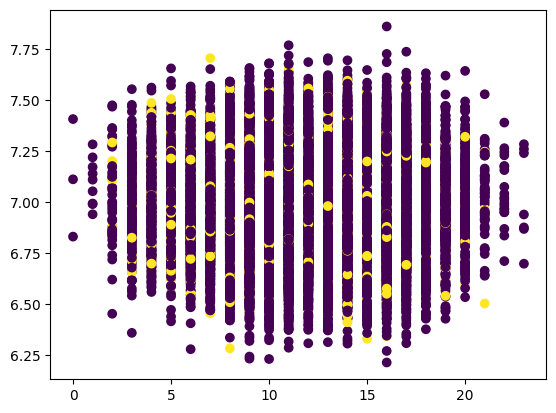

In [632]:
plt.scatter(app_data['HOUR_APPR_PROCESS_START'], np.random.normal(7, 0.2, size=len(app_data)), c=app_data['TARGET'])

Not infomraitve, removing

In [23]:
app_data.drop('HOUR_APPR_PROCESS_START', axis=1, inplace=True)

Final data with dropped columns and row
Log Transformaiton will apply in th epipeling now here

Now lets do final validation

In [43]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CR

In [ ]:
# Client Information
col = '''CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
DEBT_TO_INCOME
OCCUPATION_TYPE
ORGANIZATION_TYPE
AVERAGE_EXTERNAL_RATING
N_DOCUMENTS_PROVIDED
ADDITIONAL_DOC_PROVIDED
NOT_EMPLOYED_FLAG
ISMISSING_BUREAU_INFO
'''
client_col = col.split('\n')[:-1]

In [47]:
app_data[client_col].head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  DEBT_TO_INCOME  \
0           M             0                1             0        2.007889   
1           F             0                0             0        4.790750   
2           M             1                1             0        2.000000   
3           F             0                1             0        2.316167   
4           M             0                1             0        4.222222   

  OCCUPATION_TYPE       ORGANIZATION_TYPE  AVERAGE_EXTERNAL_RATING  \
0        Laborers  Business Entity Type 3                   0.1618   
1      Core staff                  School                   0.4668   
2        Laborers              Government                   0.6427   
3        Laborers  Business Entity Type 3                   0.6504   
4      Core staff                Religion                   0.3227   

   N_DOCUMENTS_PROVIDED  ADDITIONAL_DOC_PROVIDED  
0                     1                     True  
1                     1                     True  
2                     0                    False  
3                     1                     True  
4                     1                     True

In [62]:
# Previous application info
col = ['TOT_PREV_APP', 'PREV_APPROVED_CNT', 'PREV_CANCELLED_CNT', 'PREV_REFUSED_CNT', 'PREV_UNUSED_CNT']

# Multicollienar
# will keep total previous app
# and create ratio for others

app_data['APPROVED_RATIO'] = app_data['PREV_APPROVED_CNT'] / app_data['TOT_PREV_APP'].apply(lambda x: 1 if x == 0 else x)
app_data['REFUSED_RATIO'] = app_data['PREV_REFUSED_CNT'] / app_data['TOT_PREV_APP'].apply(lambda x: 1 if x == 0 else x)
app_data['CANCELLED_RATIO'] = app_data['PREV_CANCELLED_CNT'] / app_data['TOT_PREV_APP'].apply(lambda x: 1 if x == 0 else x)
app_data['UNUSED_RATIO'] = app_data['PREV_UNUSED_CNT'] / app_data['TOT_PREV_APP'].apply(lambda x: 1 if x == 0 else x)

prev_app = ['TOT_PREV_APP', 'APPROVED_RATIO', 'REFUSED_RATIO', 'CANCELLED_RATIO', 'UNUSED_RATIO']

app_data[prev_app].head()


TOT_PREV_APP  APPROVED_RATIO  REFUSED_RATIO  CANCELLED_RATIO  UNUSED_RATIO
0             0             0.0            0.0              0.0           0.0
1             0             0.0            0.0              0.0           0.0
2             0             0.0            0.0              0.0           0.0
3             0             0.0            0.0              0.0           0.0
4             1             1.0            0.0              0.0           0.0

In [57]:
# collateral/property/education details
name_col = '''NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
'''.split('\n')[:-1]

app_data[name_col].head()

NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  
0  Single / not married  House / apartment  
1               Married  House / apartment  
2  Single / not married  House / apartment  
3        Civil marriage  House / apartment  
4  Single / not married  House / apartment

In [58]:
# Client's Region
region = '''REGION_RATING_CLIENT
'''.split('\n')[:-1]

app_data[region].head()

REGION_RATING_CLIENT
0                     2
1                     1
2                     2
3                     2
4                     2

<Axes: xlabel='REGION_RATING_CLIENT', ylabel='count'>

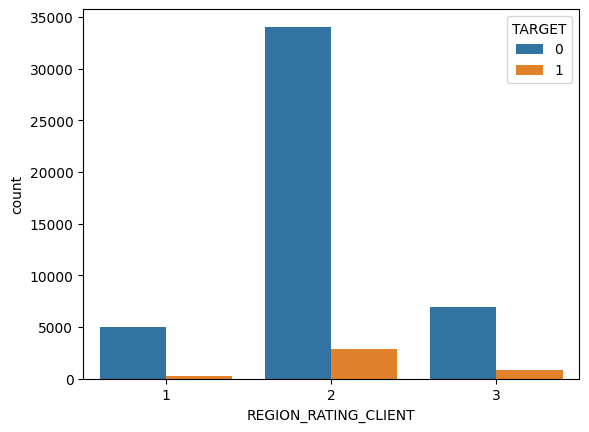

In [37]:
sns.countplot(data=app_data, x='REGION_RATING_CLIENT', hue='TARGET')

In [60]:
# Client YEAR INFO
year = [col for col in app_data.columns if 'YEARS' in col and 'log' not in col]
app_data[year].head()

YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0        25.92            1.75                9.99              5.81   
1        45.93            3.25                3.25              0.80   
2        52.18            0.62               11.67              6.93   
3        52.07            8.33               26.94              6.68   
4        54.61            8.32               11.81              9.47   

   YEARS_LAST_PHONE_CHANGE  
0                     3.11  
1                     2.27  
2                     2.23  
3                     1.69  
4                     3.03

In [67]:
# NOw lets combine the data
final_col = client_col + prev_app + name_col + region + year

app_data_final = app_data[final_col + ['TARGET']]

In [74]:
app_data_final.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'DEBT_TO_INCOME', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'AVERAGE_EXTERNAL_RATING', 'N_DOCUMENTS_PROVIDED',
       'ADDITIONAL_DOC_PROVIDED', 'TOT_PREV_APP', 'APPROVED_RATIO',
       'REFUSED_RATIO', 'CANCELLED_RATIO', 'UNUSED_RATIO', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'YEARS_LAST_PHONE_CHANGE', 'TARGET'],
      dtype='object')

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = app_data_final.drop('TARGET', axis=1).copy()

cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

X_const = add_constant(X)

In [94]:
vif_df = pd.DataFrame()
vif_df["feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df.sort_values("VIF", ascending=False))


c:\Users\adars\Documents\Ireland_Project\Loan_approval_ml\loan_approval_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               feature           VIF
36                             OCCUPATION_TYPE_Retired           inf
33                            OCCUPATION_TYPE_On Leave           inf
108                   NAME_INCOME_TYPE_Maternity leave           inf
109                         NAME_INCOME_TYPE_Pensioner           inf
0                                                const  2.870844e+04
113                           NAME_INCOME_TYPE_Working  6.256647e+03
107              NAME_INCOME_TYPE_Commercial associate  4.450835e+03
75                                ORGANIZATION_TYPE_NA  3.791572e+03
110                     NAME_INCOME_TYPE_State servant  1.638494e+03
117  NAME_EDUCATION_TYPE_Secondary / secondary special  5.152623e+02
114               NAME_EDUCATION_TYPE_Higher education  4.623100e+02
47            ORGANIZATION_TYPE_Business Entity Type 3  1.281908e+02
85                     ORGANIZATION_TYPE_Self-employed  8.155882e+01
115              NAME_EDUCATION_TY

We need to remove multicollinearity so, I will be combiniing occuptaion for retire adn pensioner as 

In [83]:
del(app_data)

In [114]:
X_const['IS_RETIRED'] = (
    (X['OCCUPATION_TYPE_Retired'] == 1) |
    (X['NAME_INCOME_TYPE_Pensioner'] == 1)
).astype(int)


X_const['IS_ON_LEAVE'] = (
    (X['OCCUPATION_TYPE_On Leave'] == 1) |
    (X['NAME_INCOME_TYPE_Maternity leave'] == 1)
).astype(int)

X_const.drop(columns=[
    'OCCUPATION_TYPE_Retired',
    'NAME_INCOME_TYPE_Pensioner',
    'OCCUPATION_TYPE_On Leave',
    'NAME_INCOME_TYPE_Maternity leave'
], inplace=True)

X_const['IS_NON_ACTIVE_EMPLOYMENT'] = (
    X_const['IS_RETIRED'] | X_const['IS_ON_LEAVE']
).astype(int)

X_const.drop(columns=['IS_RETIRED', 'IS_ON_LEAVE'], inplace=True)

In [115]:
vif_df = pd.DataFrame()
vif_df["feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df.sort_values("VIF", ascending=False))


                                               feature           VIF
0                                                const  28708.430146
109                           NAME_INCOME_TYPE_Working   6256.646258
124                           IS_NON_ACTIVE_EMPLOYMENT   6130.392407
105              NAME_INCOME_TYPE_Commercial associate   4450.834727
73                                ORGANIZATION_TYPE_NA   2561.521010
106                     NAME_INCOME_TYPE_State servant   1638.493437
113  NAME_EDUCATION_TYPE_Secondary / secondary special    515.262331
110               NAME_EDUCATION_TYPE_Higher education    462.309957
45            ORGANIZATION_TYPE_Business Entity Type 3    128.190818
83                     ORGANIZATION_TYPE_Self-employed     81.558808
111              NAME_EDUCATION_TYPE_Incomplete higher     79.612729
74                             ORGANIZATION_TYPE_Other     38.895212
112                NAME_EDUCATION_TYPE_Lower secondary     31.725717
70                          ORGANI

# Still occupation and name income is causing high multicollinearrt, so now I will club some of htem

In [119]:
app_data_final['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Retired',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Government Roles', 'Unknown', 'Private service staff',
       'Medicine staff', 'Security staff', 'High skill tech staff',
       'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents',
       'Secretaries', 'IT staff', 'HR staff', 'Unemployed', 'On Leave'],
      dtype=object)

In [125]:
occupation_map = {
    'Laborers': 'Labour/LowSkill',
    'Low-skill Laborers': 'Labour/LowSkill',
    'Cleaning staff': 'Labour/LowSkill',
    'Cooking staff': 'Labour/LowSkill',
    'Waiters/barmen staff': 'Labour/LowSkill',

    'Managers': 'WhiteCollar/Admin',
    'Core staff': 'WhiteCollar/Admin',
    'Sales staff': 'WhiteCollar/Admin',
    'Private service staff': 'WhiteCollar/Admin',
    'Secretaries': 'WhiteCollar/Admin',
    'Realty agents': 'WhiteCollar/Admin',
    'HR staff': 'WhiteCollar/Admin',
    'Accountants': 'WhiteCollar/Admin',

    'Drivers': 'Technical/Skilled',
    'High skill tech staff': 'Technical/Skilled',
    'Medicine staff': 'Technical/Skilled',
    'Security staff': 'Technical/Skilled',
    'IT staff': 'Technical/Skilled',
    'Government Roles': 'Technical/Skilled',

    'Retired': 'NonActive',
    'Unemployed': 'NonActive',
    'On Leave': 'NonActive',
    'Unknown': 'NonActive'
}


app_data_final['OCCUPATION_TYPE_GROUPED'] = app_data_final['OCCUPATION_TYPE'].map(occupation_map).fillna('Other')
app_data_final.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [135]:
pd.crosstab(app_data_final['OCCUPATION_TYPE_GROUPED'], app_data_final['TARGET'])

TARGET                       0     1
OCCUPATION_TYPE_GROUPED             
Labour/LowSkill          10064  1175
NonActive                14033   986
Technical/Skilled         7423   731
WhiteCollar/Admin        14453  1134

In [122]:
app_data_final['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'NA', 'Electricity', 'Medicine', 'Business Entity Type 2',
       'Self-employed', 'Transport: type 2', 'Construction', 'Housing',
       'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military',
       'Services', 'Security Ministries', 'Transport: type 4',
       'Industry: type 1', 'Emergency', 'Security', 'Trade: type 2',
       'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'In

In [ ]:
org_map = {
    'Business Entity Type 1': 'Business',
    'Business Entity Type 2': 'Business',
    'Business Entity Type 3': 'Business',
    'Realtor': 'Business',
    
    'Trade: type 1': 'Trade', 'Trade: type 2': 'Trade', 'Trade: type 3': 'Trade',
    'Trade: type 4': 'Trade', 'Trade: type 5': 'Trade', 'Trade: type 6': 'Trade',
    'Trade: type 7': 'Trade',

    'Industry: type 1': 'Industry', 'Industry: type 2': 'Industry',
    'Industry: type 3': 'Industry', 'Industry: type 4': 'Industry',
    'Industry: type 5': 'Industry', 'Industry: type 6': 'Industry',
    'Industry: type 7': 'Industry', 'Industry: type 8': 'Industry',
    'Industry: type 9': 'Industry', 'Industry: type 10': 'Industry',
    'Industry: type 11': 'Industry', 'Industry: type 12': 'Industry',
    'Industry: type 13': 'Industry',

    'Transport: type 1': 'Transport', 'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport', 'Transport: type 4': 'Transport',

    'Government': 'Public Service', 'Security Ministries': 'Public Service',
    'Police': 'Public Service', 'Military': 'Public Service',

    'School': 'Education', 'University': 'Education', 'Kindergarten': 'Education',

    'Medicine': 'Healthcare', 'Emergency': 'Healthcare',

    'Construction': 'Construction', 'Housing': 'Construction',

    'Bank': 'Finance', 'Insurance': 'Finance',

    'Services': 'Services', 'Legal Services': 'Services',
    'Cleaning': 'Services', 'Culture': 'Services',
    'Hotel': 'Services', 'Restaurant': 'Services',

    'Telecom': 'Communication', 'Mobile': 'Communication', 'Advertising': 'Communication',

    'Agriculture': 'Agriculture',
    'Religion': 'Religion',
    'Self-employed': 'Self-Employed',

    'NA': 'Unknown/Other', 'Other': 'Unknown/Other'
}

app_data_final['ORG_GROUP'] = app_data_final['ORGANIZATION_TYPE'].map(org_map).fillna('Unknown/Other')


In [133]:
pd.crosstab(app_data_final['ORG_GROUP'], app_data_final['TARGET'])

TARGET              0     1
ORG_GROUP                  
Agriculture       341    51
Business        12577  1242
Communication     211    19
Construction     1405   150
Education        2609   153
Finance           490    34
Healthcare       1773   137
Industry         2167   199
Public Service   2687   184
Religion           13     1
Self-Employed    5612   628
Services          825    78
Trade            2047   210
Transport        1321   127
Unknown/Other   11895   813

In [124]:
app_data_final.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [128]:
app_data_final['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [130]:
education_map = {
    'Academic degree': 'Higher Academic',
    'Higher education': 'Higher Academic',
    'Incomplete higher': 'Medium Education',
    'Secondary / secondary special': 'Medium Education',
    'Lower secondary': 'Lower Education'
}

app_data_final['EDUCATION_LEVEL'] = app_data_final['NAME_EDUCATION_TYPE'].map(education_map)
app_data_final.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)

In [136]:
pd.crosstab(app_data_final['EDUCATION_LEVEL'], app_data_final['TARGET'])

TARGET                0     1
EDUCATION_LEVEL              
Higher Academic   11581   606
Lower Education     547    73
Medium Education  33845  3347

In [131]:
X = app_data_final.drop('TARGET', axis=1).copy()

cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

X_const = add_constant(X)

In [132]:
vif_df = pd.DataFrame()
vif_df["feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df.sort_values("VIF", ascending=False))

                                      feature           VIF
0                                       const  25592.080801
34                   NAME_INCOME_TYPE_Working   6252.601938
28      NAME_INCOME_TYPE_Commercial associate   4448.049141
30                 NAME_INCOME_TYPE_Pensioner   3677.155016
31             NAME_INCOME_TYPE_State servant   1637.155862
58                    ORG_GROUP_Unknown/Other     26.933755
45                         ORG_GROUP_Business     26.501798
40        NAME_HOUSING_TYPE_House / apartment     26.360607
54                    ORG_GROUP_Self-Employed     14.931341
26              NAME_TYPE_SUITE_Unaccompanied     14.563626
44             NAME_HOUSING_TYPE_With parents     12.974020
21                     NAME_TYPE_SUITE_Family     11.432084
41      NAME_HOUSING_TYPE_Municipal apartment     10.328211
8                                TOT_PREV_APP      9.242671
52                   ORG_GROUP_Public Service      8.027960
48                        ORG_GROUP_Educ

In [137]:
# There are still few categorical columns with high VIF but will keep those

In [144]:
engine = write_sql_conn_create()
app_data_final.to_sql('preprocessed_data', engine, if_exists='replace', index=False)

Connection to SQL Server established successfully.


26

In [139]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X = app_data_final.drop(columns=['TARGET'])
y = app_data_final['TARGET']

numeric_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() > 2]
binary_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() == 2]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('bin', 'passthrough', binary_cols)
    ]
)

X_transformed = preprocessor.fit_transform(X)



In [140]:
from sklearn.decomposition import  PCA

pca_model = PCA()

pca_x = pca_model.fit_transform(X_transformed)


In [141]:
cum_var = np.cumsum(pca_model.explained_variance_ratio_)
print(f'{len(cum_var[cum_var < 0.95])} components explain 95% of the variance')

25 components explain 95% of the variance


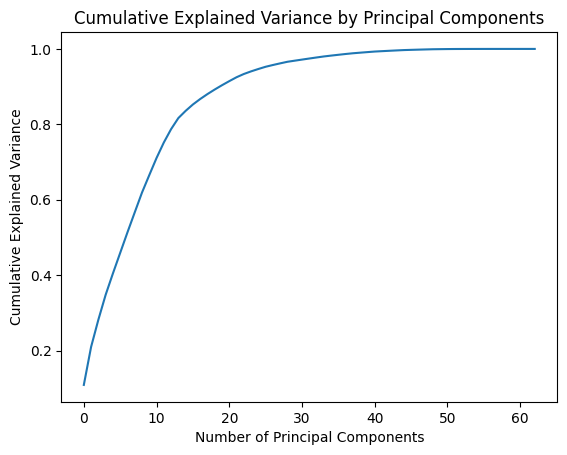

In [142]:
plt.plot(cum_var)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components');

The first four principal components explain approximately 30% of the total variance. While this provides some insight, it is not sufficient to fully capture the structure of the data. Since plotting all 46 components is not practical, we will limit our visual analysis to the first four principal components.

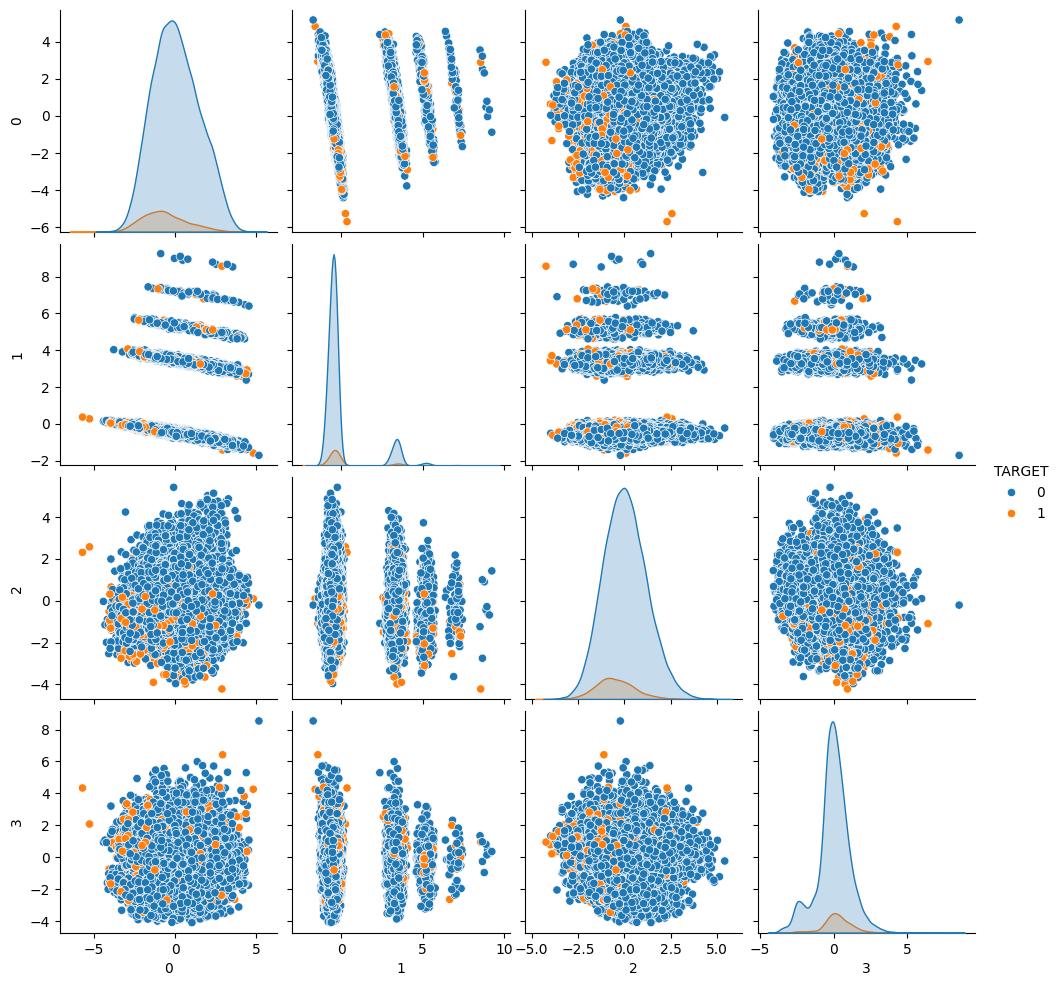

In [143]:
pca_df = pd.DataFrame(pca_x[:, :4]) 
pca_df['TARGET'] = y.values  


sns.pairplot(pca_df, hue='TARGET')

### No clear seperation

The dataset contains a high number of features (181 columns), many of which are numeric, categorical, or binary. While realtions were explored, meaningful patterns between the features and the target variable (TARGET) were not visually obvious.

Even after applying dimensionality reduction techniques like PCA (Principal Component Analysis) and visualizing the first few principal components, there was no clear separation between classes. This is expected in high-dimensional tabular data, where complex patterns may not be easily captured or visualized in 2D.

Therefore, further exploration via traditional EDA is unlikely to yield actionable insights. We now proceed to modelling, where machine learning algorithms can leverage the full feature space to uncover predictive patterns.